In [1]:
import pandas as pd
import matplotlib
import numpy as no
%matplotlib inline

In [2]:
# Pandas needs numpy as pandas is built on numpy, it is used to represent the data storage
# Tripe quotes string can used to span multiple lines

### Loading NYC Central park data

In [3]:
df_nyc=pd.read_csv("data/central_park.txt",parse_dates=[0])

In [4]:
df_nyc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3287 entries, 0 to 3286
Data columns (total 23 columns):
EST                           3287 non-null datetime64[ns]
Max TemperatureF              3285 non-null float64
Mean TemperatureF             3285 non-null float64
Min TemperatureF              3285 non-null float64
Max Dew PointF                3285 non-null float64
MeanDew PointF                3285 non-null float64
Min DewpointF                 3285 non-null float64
Max Humidity                  3285 non-null float64
 Mean Humidity                3285 non-null float64
 Min Humidity                 3285 non-null float64
 Max Sea Level PressureIn     3275 non-null float64
 Mean Sea Level PressureIn    3275 non-null float64
 Min Sea Level PressureIn     3275 non-null float64
 Max VisibilityMiles          3277 non-null float64
 Mean VisibilityMiles         3277 non-null float64
 Min VisibilityMiles          3277 non-null float64
 Max Wind SpeedMPH            3245 non-null float64
 M

In [5]:
df_nyc.columns=[x.strip().replace(' ','_') for x in df_nyc.columns]
df_nyc['PrecipitationIn']=pd.to_numeric(df_nyc['PrecipitationIn'].replace('T','0.001'))

In [6]:
df_nyc['Events']=df_nyc['Events'].fillna('')

In [7]:
df_nyc['Events'].hasnans

False

In [8]:
df_nyc.Events.value_counts()

                 2113
Rain              803
Fog-Rain          189
Snow               74
Fog-Snow           39
Rain-Snow          31
Fog-Rain-Snow      22
Fog                15
Thunderstorm        1
Name: Events, dtype: int64

In [9]:
df_nyc.columns

Index(['EST', 'Max_TemperatureF', 'Mean_TemperatureF', 'Min_TemperatureF',
       'Max_Dew_PointF', 'MeanDew_PointF', 'Min_DewpointF', 'Max_Humidity',
       'Mean_Humidity', 'Min_Humidity', 'Max_Sea_Level_PressureIn',
       'Mean_Sea_Level_PressureIn', 'Min_Sea_Level_PressureIn',
       'Max_VisibilityMiles', 'Mean_VisibilityMiles', 'Min_VisibilityMiles',
       'Max_Wind_SpeedMPH', 'Mean_Wind_SpeedMPH', 'Max_Gust_SpeedMPH',
       'PrecipitationIn', 'CloudCover', 'Events', 'WindDirDegrees'],
      dtype='object')

### Loading Nino dataset

In [10]:
names='''obs
year
month
day
date
latitude
longitude
zon.winds
mer.winds
humidity
air temp.
s.s.temp.'''.split('\n')
print(names)

['obs', 'year', 'month', 'day', 'date', 'latitude', 'longitude', 'zon.winds', 'mer.winds', 'humidity', 'air temp.', 's.s.temp.']


In [11]:
%%time
df_nino=pd.read_csv('data/tao-all2.dat.gz',sep=' ',parse_dates=[[1,2,3]],names=names,na_values='.')

Wall time: 26.8 s


In [12]:
df_nino.shape

(178080, 10)

In [13]:
df_nino.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178080 entries, 0 to 178079
Data columns (total 10 columns):
year_month_day    178080 non-null datetime64[ns]
obs               178080 non-null int64
date              178080 non-null int64
latitude          178080 non-null float64
longitude         178080 non-null float64
zon.winds         152917 non-null float64
mer.winds         152918 non-null float64
humidity          112319 non-null float64
air temp.         159843 non-null float64
s.s.temp.         161073 non-null float64
dtypes: datetime64[ns](1), float64(7), int64(2)
memory usage: 13.6 MB


In [14]:

for x in df_nino.columns:
    if x.endswith('.') :
        x[:-1] 
    else :
        x 


In [15]:
x=[x[:-1] if x.endswith('.') else x for x in df_nino.columns ]

In [16]:
x

['year_month_day',
 'obs',
 'date',
 'latitude',
 'longitude',
 'zon.winds',
 'mer.winds',
 'humidity',
 'air temp',
 's.s.temp']

In [17]:
df_nino.columns=[x.strip().replace(' ','_') for x in df_nino.columns]
df_nino.columns=[x[:-1] if x.endswith('.') else x for x in df_nino.columns ]

In [18]:
df_nino['air_temp_F']=df_nino['air_temp']*9/5+32

In [19]:
wind_columns=[x for x in df_nino.columns if x.endswith('winds')]
for c in wind_columns:
    df_nino['{}_mph'.format(c)]=df_nino[c]*2.237

In [20]:
df_nino.date=pd.to_datetime(df_nino.date,format='%y%m%d')

In [21]:
df_nino.drop('obs',axis=1,inplace=True)

In [22]:
df_nino['humidity'].hasnans

True

In [23]:
df_nino['humidity'].is_monotonic

False

In [24]:
df_nino['humidity'].is_unique

False

In [26]:
df_nino['humidity'].max()

99.9

In [27]:
df_nino['humidity'].min()

45.4

In [28]:
df_nino['humidity'].quantile()

81.2

In [29]:
df_nino['humidity'].quantile([0.2,0.3])

0.2    76.8
0.3    78.5
Name: humidity, dtype: float64

In [27]:
#df_nino['air_temp']

In [30]:
df_nino['air_temp'].corr(df_nino['date'].astype('int64'))

0.25726474869852334

In [31]:
df_nino.year_month_day.agg(['min','max','mean'])

min   1980-03-07
max   1998-06-23
Name: year_month_day, dtype: datetime64[ns]

In [32]:
df_nino.air_temp.describe()

count    159843.000000
mean         26.887567
std           1.816429
min          17.050000
25%          26.060000
50%          27.340000
75%          28.180000
max          31.660000
Name: air_temp, dtype: float64

In [33]:
df_nino.air_temp.agg(['min','max','mean'])

min     17.050000
max     31.660000
mean    26.887567
Name: air_temp, dtype: float64

In [34]:
temps=[col for col in df_nino.columns if 'temp' in col]
temps

['air_temp', 's.s.temp', 'air_temp_F']

In [35]:
df_nino[temps].describe()

,air_temp,s.s.temp,air_temp_F
count,159843.000000,161073.000000,159843.000000
mean,26.887567,27.715309,80.397620
std,1.816429,2.057428,3.269572
min,17.050000,17.350000,62.690000
25%,26.060000,26.770000,78.908000
50%,27.340000,28.290000,81.212000
75%,28.180000,29.230000,82.724000
max,31.660000,31.260000,88.988000


### Potting
* Has a wrapper around Matplotlib

In [36]:
%matplotlib inline

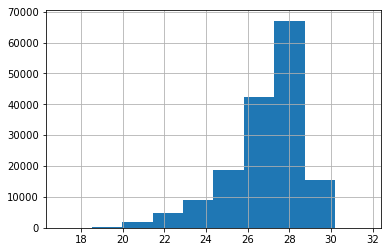

In [37]:
df_nino.air_temp.hist()

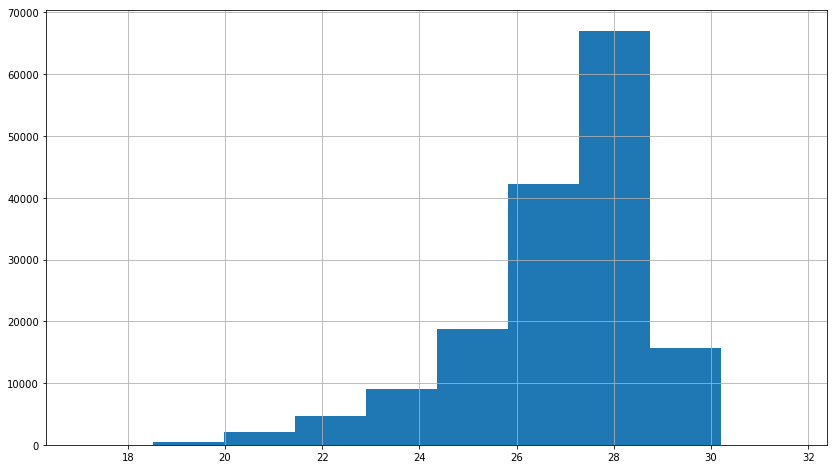

In [29]:
_= df_nino.air_temp.hist(figsize=(14,8))

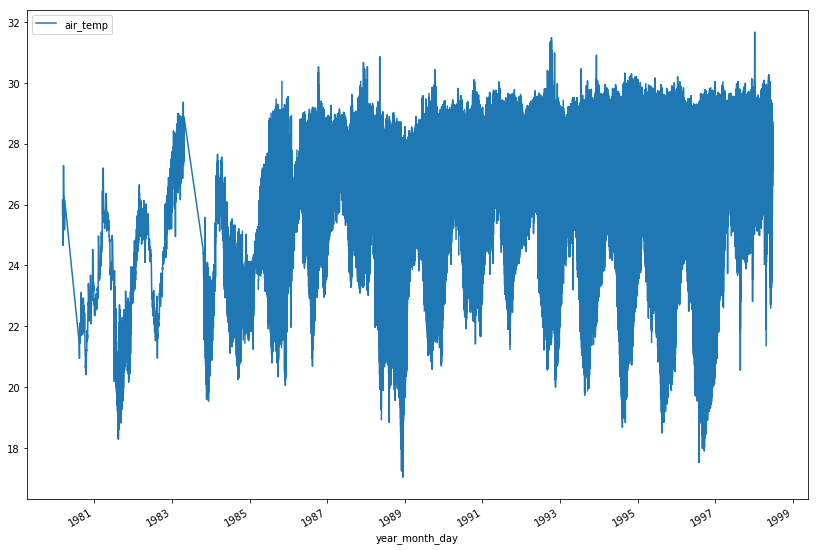

In [39]:
df_nino.plot(x='year_month_day',y='air_temp',figsize=(14,10))

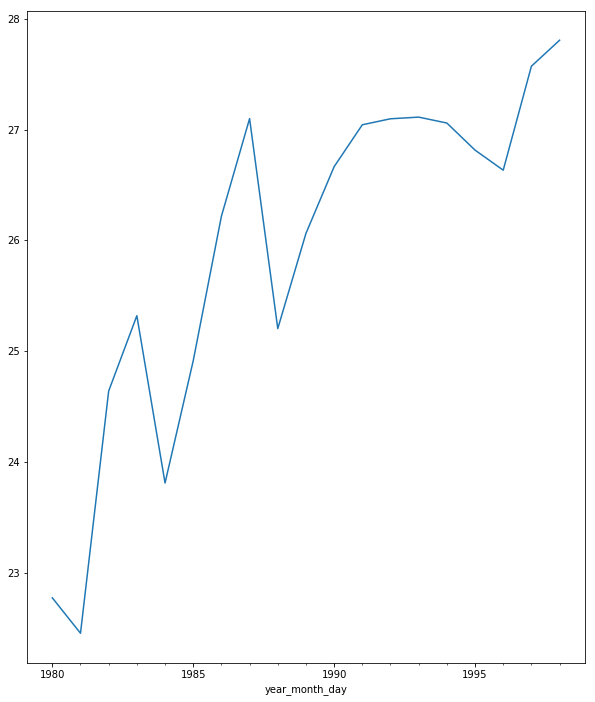

In [32]:
## Let us agrgregate by month for clear view
_=df_nino.set_index('year_month_day').air_temp.resample('Y').mean().plot(figsize=(10,12))

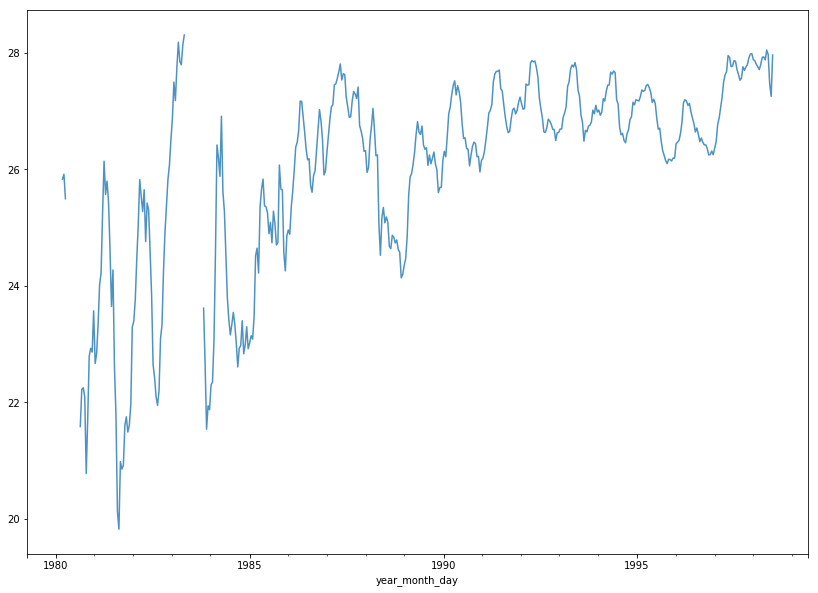

In [43]:
(
    df_nino.set_index('year_month_day')
        .air_temp.resample('2W') 
        .mean() 
        .plot(figsize=(14,10),alpha=.8)
)

In [44]:
df_nino.columns

Index(['year_month_day', 'date', 'latitude', 'longitude', 'zon.winds',
       'mer.winds', 'humidity', 'air_temp', 's.s.temp', 'air_temp_F',
       'zon.winds_mph', 'mer.winds_mph'],
      dtype='object')

* ( ) executes on priority

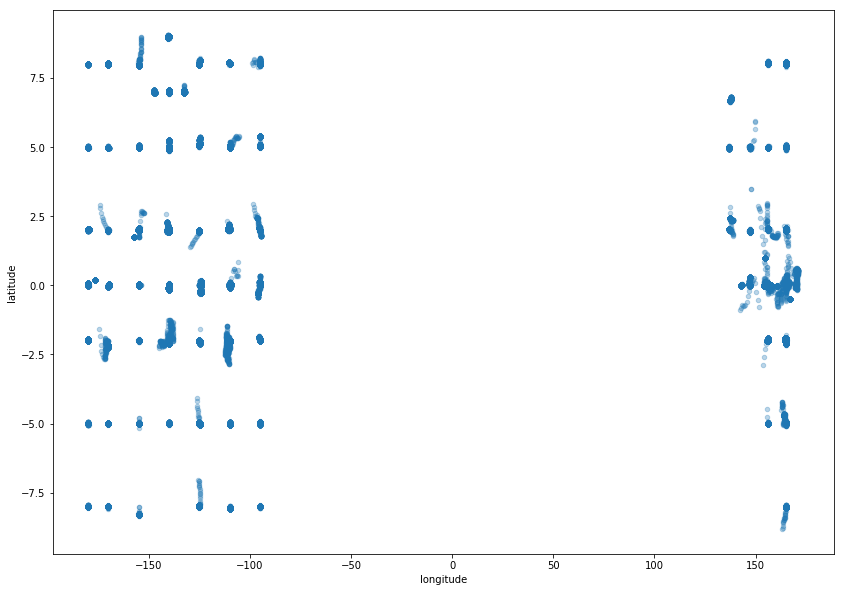

In [43]:
(    df_nino.plot(x='longitude',y='latitude',figsize=(14,10),alpha=0.3,kind='scatter')
)

*We can use Folium library to show the lat and long on the MAP
https://github.com/python-visualization/folium

### Filtering

In [46]:
#First create the masks
y1980=df_nino.year_month_day.dt.year>1980
y1999=df_nino.year_month_day.dt.year<1999

In [48]:
df_nino[y1980 & y1999].tail()

,year_month_day,date,latitude,longitude,zon.winds,mer.winds,humidity,air_temp,s.s.temp,air_temp_F,zon.winds_mph,mer.winds_mph
178075,1998-06-11,1998-06-11,8.96,-140.33,-5.1,-0.4,94.1,26.04,28.14,78.872,-11.4087,-0.8948
178076,1998-06-12,1998-06-12,8.96,-140.32,-4.3,-3.3,93.2,25.80,27.87,78.440,-9.6191,-7.3821
178077,1998-06-13,1998-06-13,8.95,-140.34,-6.1,-4.8,81.3,27.17,27.93,80.906,-13.6457,-10.7376
178078,1998-06-14,1998-06-14,8.96,-140.33,-4.9,-2.3,76.2,27.36,28.03,81.248,-10.9613,-5.1451
178079,1998-06-15,1998-06-15,8.95,-140.33,NaN,NaN,NaN,27.09,28.09,80.762,NaN,NaN


In [55]:
df_nino[(df_nino.year_month_day.dt.year>=1980) & (df_nino.year_month_day.dt.year<1999)].shape

(178080, 12)

In [56]:
maskBooArra=df_nino.year_month_day.dt.month==12

In [59]:
maskBooArra

True

In [58]:
df_nino[maskBooArra].head()

,year_month_day,date,latitude,longitude,zon.winds,mer.winds,humidity,air_temp,s.s.temp,air_temp_F,zon.winds_mph,mer.winds_mph
135,1980-12-01,1980-12-01,0.0,-109.56,-2.8,4.2,NaN,22.09,22.02,71.762,-6.2636,9.3954
136,1980-12-02,1980-12-02,0.0,-109.56,-1.7,5.4,NaN,22.47,22.20,72.446,-3.8029,12.0798
137,1980-12-03,1980-12-03,0.0,-109.56,-3.0,4.8,NaN,22.73,22.39,72.914,-6.7110,10.7376
138,1980-12-04,1980-12-04,0.0,-109.56,-4.0,3.6,NaN,22.62,22.55,72.716,-8.9480,8.0532
139,1980-12-05,1980-12-05,0.0,-109.56,-3.1,4.1,NaN,22.91,22.66,73.238,-6.9347,9.1717


In [60]:
df_nino[df_nino.year_month_day.dt.year==1998]

,year_month_day,date,latitude,longitude,zon.winds,mer.winds,humidity,air_temp,s.s.temp,air_temp_F,zon.winds_mph,mer.winds_mph
5672,1998-01-01,1998-01-01,0.03,-109.99,-7.8,-2.9,89.1,27.77,28.66,81.986,-17.4486,-6.4873
5673,1998-01-02,1998-01-02,0.03,-109.99,-8.1,-1.2,90.3,27.57,28.59,81.626,-18.1197,-2.6844
5674,1998-01-03,1998-01-03,0.02,-109.99,-6.3,-5.3,88.0,28.42,28.52,83.156,-14.0931,-11.8561
5675,1998-01-04,1998-01-04,0.02,-109.99,-0.2,-4.3,88.0,28.23,28.61,82.814,-0.4474,-9.6191
5676,1998-01-05,1998-01-05,0.02,-109.99,1.0,2.1,89.9,26.41,28.49,79.538,2.2370,4.6977
5677,1998-01-06,1998-01-06,0.02,-109.98,0.7,2.6,81.9,27.69,28.65,81.842,1.5659,5.8162
5678,1998-01-07,1998-01-07,0.02,-109.99,-0.4,1.0,82.3,28.11,29.07,82.598,-0.8948,2.2370
5679,1998-01-08,1998-01-08,0.03,-109.99,-2.7,-0.9,87.6,27.18,29.16,80.924,-6.0399,-2.0133
5680,1998-01-09,1998-01-09,0.03,-109.99,-2.3,-0.9,88.0,27.53,28.80,81.554,-5.1451,-2.0133
5681,1998-01-10,1998-01-10,0.03,-109.99,-3.1,0.2,89.9,27.22,28.79,80.996,-6.9347,0.4474


In [62]:
df_nino[(df_nino.year_month_day.dt.year==1998) & (df_nino.air_temp<30)]

,year_month_day,date,latitude,longitude,zon.winds,mer.winds,humidity,air_temp,s.s.temp,air_temp_F,zon.winds_mph,mer.winds_mph
5672,1998-01-01,1998-01-01,0.03,-109.99,-7.8,-2.9,89.1,27.77,28.66,81.986,-17.4486,-6.4873
5673,1998-01-02,1998-01-02,0.03,-109.99,-8.1,-1.2,90.3,27.57,28.59,81.626,-18.1197,-2.6844
5674,1998-01-03,1998-01-03,0.02,-109.99,-6.3,-5.3,88.0,28.42,28.52,83.156,-14.0931,-11.8561
5675,1998-01-04,1998-01-04,0.02,-109.99,-0.2,-4.3,88.0,28.23,28.61,82.814,-0.4474,-9.6191
5676,1998-01-05,1998-01-05,0.02,-109.99,1.0,2.1,89.9,26.41,28.49,79.538,2.2370,4.6977
5677,1998-01-06,1998-01-06,0.02,-109.98,0.7,2.6,81.9,27.69,28.65,81.842,1.5659,5.8162
5678,1998-01-07,1998-01-07,0.02,-109.99,-0.4,1.0,82.3,28.11,29.07,82.598,-0.8948,2.2370
5679,1998-01-08,1998-01-08,0.03,-109.99,-2.7,-0.9,87.6,27.18,29.16,80.924,-6.0399,-2.0133
5680,1998-01-09,1998-01-09,0.03,-109.99,-2.3,-0.9,88.0,27.53,28.80,81.554,-5.1451,-2.0133
5681,1998-01-10,1998-01-10,0.03,-109.99,-3.1,0.2,89.9,27.22,28.79,80.996,-6.9347,0.4474


In [61]:
df_nino

,year_month_day,date,latitude,longitude,zon.winds,mer.winds,humidity,air_temp,s.s.temp,air_temp_F,zon.winds_mph,mer.winds_mph
0,1980-03-07,1980-03-07,-0.02,-109.46,-6.8,0.7,NaN,26.14,26.24,79.052,-15.2116,1.5659
1,1980-03-08,1980-03-08,-0.02,-109.46,-4.9,1.1,NaN,25.66,25.97,78.188,-10.9613,2.4607
2,1980-03-09,1980-03-09,-0.02,-109.46,-4.5,2.2,NaN,25.69,25.28,78.242,-10.0665,4.9214
3,1980-03-10,1980-03-10,-0.02,-109.46,-3.8,1.9,NaN,25.57,24.31,78.026,-8.5006,4.2503
4,1980-03-11,1980-03-11,-0.02,-109.46,-4.2,1.5,NaN,25.30,23.19,77.540,-9.3954,3.3555
5,1980-03-12,1980-03-12,-0.02,-109.46,-4.4,0.3,NaN,24.72,23.64,76.496,-9.8428,0.6711
6,1980-03-13,1980-03-13,-0.02,-109.46,-3.2,0.1,NaN,24.66,24.34,76.388,-7.1584,0.2237
7,1980-03-14,1980-03-14,-0.02,-109.46,-3.1,0.6,NaN,25.17,24.14,77.306,-6.9347,1.3422
8,1980-03-15,1980-03-15,-0.02,-109.46,-3.0,1.0,NaN,25.59,24.24,78.062,-6.7110,2.2370
9,1980-03-16,1980-03-16,-0.02,-109.46,-1.2,1.0,NaN,26.71,25.94,80.078,-2.6844,2.2370


* Loc helps to filter by index value. If you do not give the column names , it will fetch all the columns
* .loc('1980') gives all columns

In [63]:
df_nino.loc[maskBooArra]

,year_month_day,date,latitude,longitude,zon.winds,mer.winds,humidity,air_temp,s.s.temp,air_temp_F,zon.winds_mph,mer.winds_mph
135,1980-12-01,1980-12-01,0.00,-109.56,-2.8,4.2,NaN,22.09,22.02,71.762,-6.2636,9.3954
136,1980-12-02,1980-12-02,0.00,-109.56,-1.7,5.4,NaN,22.47,22.20,72.446,-3.8029,12.0798
137,1980-12-03,1980-12-03,0.00,-109.56,-3.0,4.8,NaN,22.73,22.39,72.914,-6.7110,10.7376
138,1980-12-04,1980-12-04,0.00,-109.56,-4.0,3.6,NaN,22.62,22.55,72.716,-8.9480,8.0532
139,1980-12-05,1980-12-05,0.00,-109.56,-3.1,4.1,NaN,22.91,22.66,73.238,-6.9347,9.1717
140,1980-12-06,1980-12-06,0.00,-109.56,-4.2,5.2,NaN,22.85,22.69,73.130,-9.3954,11.6324
141,1980-12-07,1980-12-07,0.00,-109.56,-3.2,2.6,NaN,22.97,22.81,73.346,-7.1584,5.8162
142,1980-12-08,1980-12-08,0.00,-109.56,-3.8,3.2,NaN,22.98,23.00,73.364,-8.5006,7.1584
143,1980-12-09,1980-12-09,0.00,-109.56,-5.9,3.9,NaN,22.84,22.90,73.112,-13.1983,8.7243
144,1980-12-10,1980-12-10,0.00,-109.56,-4.7,2.7,NaN,22.86,22.86,73.148,-10.5139,6.0399


In [108]:
df_nino.set_index('year_month_day',inplace=True)

In [110]:
df_nino.reset_index(inplace=True)

In [64]:
df_nino.loc[maskBooArra,['air_temp','humidity']]

,air_temp,humidity
135,22.09,NaN
136,22.47,NaN
137,22.73,NaN
138,22.62,NaN
139,22.91,NaN
140,22.85,NaN
141,22.97,NaN
142,22.98,NaN
143,22.84,NaN
144,22.86,NaN


In [66]:
[x for x in df_nino.columns if 'temp' in x]

['air_temp', 's.s.temp', 'air_temp_F']

In [65]:
df_nino.loc[maskBooArra,[x for x in df_nino.columns if 'temp' in x]]

,air_temp,s.s.temp,air_temp_F
135,22.09,22.02,71.762
136,22.47,22.20,72.446
137,22.73,22.39,72.914
138,22.62,22.55,72.716
139,22.91,22.66,73.238
140,22.85,22.69,73.130
141,22.97,22.81,73.346
142,22.98,23.00,73.364
143,22.84,22.90,73.112
144,22.86,22.86,73.148


Using Sort to get a range of data values

In [68]:
df_nino.set_index('humidity').tail()

,year_month_day,date,latitude,longitude,zon.winds,mer.winds,air_temp,s.s.temp,air_temp_F,zon.winds_mph,mer.winds_mph
humidity,,,,,,,,,,,
94.1,1998-06-11,1998-06-11,8.96,-140.33,-5.1,-0.4,26.04,28.14,78.872,-11.4087,-0.8948
93.2,1998-06-12,1998-06-12,8.96,-140.32,-4.3,-3.3,25.80,27.87,78.440,-9.6191,-7.3821
81.3,1998-06-13,1998-06-13,8.95,-140.34,-6.1,-4.8,27.17,27.93,80.906,-13.6457,-10.7376
76.2,1998-06-14,1998-06-14,8.96,-140.33,-4.9,-2.3,27.36,28.03,81.248,-10.9613,-5.1451
NaN,1998-06-15,1998-06-15,8.95,-140.33,NaN,NaN,27.09,28.09,80.762,NaN,NaN


In [70]:
df_nino.set_index('humidity').loc[70:90] # gives error

KeyError: 'Cannot get left slice bound for non-unique label: 70'

In [72]:
#loc uses open sets that it includes the last element ie 90
df_nino.set_index('humidity').sort_index().loc[70:90].tail()

,year_month_day,date,latitude,longitude,zon.winds,mer.winds,air_temp,s.s.temp,air_temp_F,zon.winds_mph,mer.winds_mph
humidity,,,,,,,,,,,
90.0,1998-03-01,1998-03-01,-8.03,164.83,NaN,NaN,27.89,28.94,82.202,NaN,NaN
90.0,1993-09-14,1993-09-14,5.02,-109.97,0.5,6.6,25.22,26.49,77.396,1.1185,14.7642
90.0,1994-03-26,1994-03-26,2.04,-110.11,NaN,NaN,26.12,26.49,79.016,NaN,NaN
90.0,1993-07-07,1993-07-07,-7.98,164.96,-6.5,4.9,28.27,28.52,82.886,-14.5405,10.9613
90.0,1996-07-15,1996-07-15,8.06,-110.14,2.8,2.9,26.52,28.01,79.736,6.2636,6.4873


*Can use iloc to filter by index instead of by values. It is a closed set, that is it does not include the last elemnet

In [144]:
df_nino.columns

Index(['year_month_day', 'date', 'latitude', 'longitude', 'zon.winds',
       'mer.winds', 'humidity', 'air_temp', 's.s.temp', 'air_temp_F',
       'zon.winds_mph', 'mer.winds_mph'],
      dtype='object')

In [147]:
# does not include 10, meaning it is half open
df_nino.iloc[2:10,[2,3,4]]

,latitude,longitude,zon.winds
2,-0.02,-109.46,-4.5
3,-0.02,-109.46,-3.8
4,-0.02,-109.46,-4.2
5,-0.02,-109.46,-4.4
6,-0.02,-109.46,-3.2
7,-0.02,-109.46,-3.1
8,-0.02,-109.46,-3.0
9,-0.02,-109.46,-1.2


In [148]:
# This is half open, meaning it does not include the last element(4 index) but includes the intial element (2 inddex)
df_nino.iloc[2:10,2:4]

,latitude,longitude
2,-0.02,-109.46
3,-0.02,-109.46
4,-0.02,-109.46
5,-0.02,-109.46
6,-0.02,-109.46
7,-0.02,-109.46
8,-0.02,-109.46
9,-0.02,-109.46


### Assignment
* Get all data between 1980 and 1990
    * Create a mask
    * Use the mask to filter the data

In [167]:
maskyear1980=(df_nino.year_month_day.dt.year>=1980) &\
    (df_nino.year_month_day.dt.year<=1990)

In [158]:
df_nino[maskyear1980].head()

,year_month_day,date,latitude,longitude,zon.winds,mer.winds,humidity,air_temp,s.s.temp,air_temp_F,zon.winds_mph,mer.winds_mph
0,1980-03-07,1980-03-07,-0.02,-109.46,-6.8,0.7,NaN,26.14,26.24,79.052,-15.2116,1.5659
1,1980-03-08,1980-03-08,-0.02,-109.46,-4.9,1.1,NaN,25.66,25.97,78.188,-10.9613,2.4607
2,1980-03-09,1980-03-09,-0.02,-109.46,-4.5,2.2,NaN,25.69,25.28,78.242,-10.0665,4.9214
3,1980-03-10,1980-03-10,-0.02,-109.46,-3.8,1.9,NaN,25.57,24.31,78.026,-8.5006,4.2503
4,1980-03-11,1980-03-11,-0.02,-109.46,-4.2,1.5,NaN,25.30,23.19,77.540,-9.3954,3.3555


In [168]:
maskyear1990=(df_nino.year_month_day.dt.year>=1990) &\
    (df_nino.year_month_day.dt.year<=2000)

In [159]:
df_nino[maskyear1990].head()

,year_month_day,date,latitude,longitude,zon.winds,mer.winds,humidity,air_temp,s.s.temp,air_temp_F,zon.winds_mph,mer.winds_mph
2835,1990-01-01,1990-01-01,0.00,-110.02,NaN,NaN,NaN,23.55,24.37,74.390,NaN,NaN
2836,1990-01-02,1990-01-02,0.00,-110.02,NaN,NaN,NaN,23.39,24.06,74.102,NaN,NaN
2837,1990-01-03,1990-01-03,0.01,-110.02,NaN,NaN,NaN,23.42,23.85,74.156,NaN,NaN
2838,1990-01-04,1990-01-04,0.01,-110.02,NaN,NaN,NaN,23.33,23.78,73.994,NaN,NaN
2839,1990-01-05,1990-01-05,0.01,-110.02,NaN,NaN,NaN,23.33,23.60,73.994,NaN,NaN


* Get all data with long>120 and witgh lat between -2 and 2
    * Create a mask that has all the long >120
    * Use the mask to filter the data

In [161]:
masklong120=df_nino.longitude>120
masklat2tominus2=(df_nino.latitude>-2)& (df_nino.latitude<2)

In [165]:
df_nino[masklong120 & masklat2tominus2].head()

,year_month_day,date,latitude,longitude,zon.winds,mer.winds,humidity,air_temp,s.s.temp,air_temp_F,zon.winds_mph,mer.winds_mph
15098,1992-04-26,1992-04-26,0.03,143.03,0.7,1.2,73.0,28.63,29.70,83.534,1.5659,2.6844
15099,1992-04-27,1992-04-27,0.03,143.04,-0.6,3.3,78.5,28.44,29.59,83.192,-1.3422,7.3821
15100,1992-04-28,1992-04-28,0.02,143.02,-2.1,4.8,77.3,28.87,29.31,83.966,-4.6977,10.7376
15101,1992-04-29,1992-04-29,0.02,143.03,-1.1,4.7,75.4,28.79,29.30,83.822,-2.4607,10.5139
15102,1992-04-30,1992-04-30,0.02,143.03,-0.4,2.5,78.5,28.44,29.40,83.192,-0.8948,5.5925


In [ ]:
df_nino[masklong120 & masklat2tominus2].head()

* Get all data in the year 1980 to 1990 with long>120 and witgh lat between -2 and 2
    * Create a mask that has all the long >120
    * Use the mask to filter the data

In [172]:
df_nino_1980=df_nino[masklong120 & masklat2tominus2 & maskyear1980]

* scatter plot

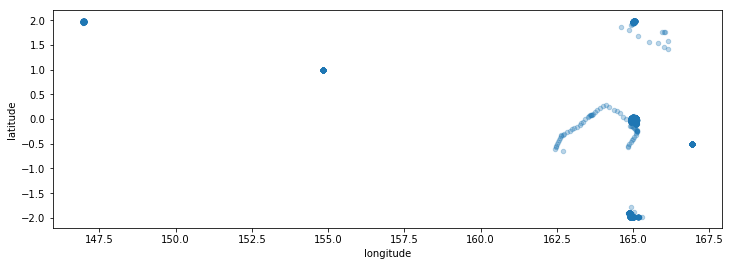

In [178]:
(    df_nino_1980.plot(x='longitude',y='latitude',figsize=(12,4),alpha=0.3,kind='scatter')
)

## Dealing with NaNs

In [182]:
#axis=1==> rows
#axis=0==> columns
df_nyc.isnull().any()

EST                          False
Max_TemperatureF              True
Mean_TemperatureF             True
Min_TemperatureF              True
Max_Dew_PointF                True
MeanDew_PointF                True
Min_DewpointF                 True
Max_Humidity                  True
Mean_Humidity                 True
Min_Humidity                  True
Max_Sea_Level_PressureIn      True
Mean_Sea_Level_PressureIn     True
Min_Sea_Level_PressureIn      True
Max_VisibilityMiles           True
Mean_VisibilityMiles          True
Min_VisibilityMiles           True
Max_Wind_SpeedMPH             True
Mean_Wind_SpeedMPH            True
Max_Gust_SpeedMPH             True
PrecipitationIn               True
CloudCover                    True
Events                       False
WindDirDegrees                True
dtype: bool

In [ ]:
#axis=1==> columns, scans all the columns and reports the status for each row
#axis=0==> rows, Scans all the rows and reports the status  for each column
df_nyc.isnull().any()

In [184]:
#axis=1==> columns, scans all the columns and reports the status for each row
df_nyc.isnull().any(axis=1)
#helps to know of any row is missing data for all the columns

0       False
1       False
2       False
3       False
4       False
5       False
6       False
7       False
8       False
9       False
10      False
11      False
12      False
13      False
14      False
15      False
16      False
17      False
18      False
19      False
20      False
21      False
22      False
23      False
24      False
25      False
26      False
27      False
28      False
29      False
        ...  
3257    False
3258    False
3259    False
3260    False
3261    False
3262    False
3263    False
3264    False
3265    False
3266    False
3267    False
3268    False
3269    False
3270    False
3271    False
3272    False
3273    False
3274    False
3275    False
3276    False
3277    False
3278    False
3279    False
3280    False
3281    False
3282    False
3283    False
3284    False
3285    False
3286    False
Length: 3287, dtype: bool

In [187]:
# Now to find all the rows which has missing data for any one column
# use the above as a mask
df_nyc[df_nyc.isnull().any(axis=1)]

,EST,Max_TemperatureF,Mean_TemperatureF,Min_TemperatureF,Max_Dew_PointF,MeanDew_PointF,Min_DewpointF,Max_Humidity,Mean_Humidity,Min_Humidity,...,Max_VisibilityMiles,Mean_VisibilityMiles,Min_VisibilityMiles,Max_Wind_SpeedMPH,Mean_Wind_SpeedMPH,Max_Gust_SpeedMPH,PrecipitationIn,CloudCover,Events,WindDirDegrees
86,2006-03-28,55.0,49.0,43.0,31.0,25.0,21.0,58.0,41.0,29.0,...,10.0,10.0,10.0,10.0,5.0,NaN,0.000,3.0,,93.0
87,2006-03-29,63.0,52.0,41.0,34.0,26.0,21.0,73.0,41.0,23.0,...,10.0,10.0,10.0,12.0,5.0,NaN,0.000,0.0,,129.0
103,2006-04-14,66.0,60.0,53.0,55.0,49.0,41.0,100.0,74.0,43.0,...,10.0,6.0,2.0,10.0,3.0,NaN,0.210,5.0,Rain,137.0
116,2006-04-27,73.0,60.0,48.0,37.0,32.0,28.0,59.0,37.0,21.0,...,10.0,10.0,10.0,8.0,5.0,NaN,0.000,2.0,,299.0
123,2006-05-04,82.0,66.0,53.0,53.0,49.0,39.0,94.0,62.0,23.0,...,10.0,10.0,10.0,9.0,4.0,NaN,0.000,1.0,,215.0
124,2006-05-05,80.0,72.0,64.0,52.0,44.0,37.0,58.0,39.0,23.0,...,10.0,10.0,10.0,9.0,5.0,NaN,0.000,0.0,,294.0
129,2006-05-10,69.0,60.0,53.0,54.0,49.0,46.0,83.0,70.0,56.0,...,10.0,10.0,7.0,10.0,5.0,NaN,0.000,8.0,,34.0
144,2006-05-25,75.0,66.0,57.0,52.0,45.0,36.0,63.0,45.0,33.0,...,10.0,10.0,10.0,10.0,4.0,NaN,0.000,0.0,,240.0
145,2006-05-26,73.0,66.0,59.0,65.0,61.0,54.0,96.0,81.0,69.0,...,10.0,4.0,0.0,7.0,2.0,NaN,0.240,4.0,Fog-Rain,45.0
148,2006-05-29,88.0,76.0,66.0,68.0,63.0,57.0,84.0,66.0,44.0,...,10.0,8.0,5.0,7.0,3.0,NaN,0.010,1.0,,215.0


In [193]:
missingcols=df_nyc.isnull()
missingcols

,EST,Max_TemperatureF,Mean_TemperatureF,Min_TemperatureF,Max_Dew_PointF,MeanDew_PointF,Min_DewpointF,Max_Humidity,Mean_Humidity,Min_Humidity,...,Max_VisibilityMiles,Mean_VisibilityMiles,Min_VisibilityMiles,Max_Wind_SpeedMPH,Mean_Wind_SpeedMPH,Max_Gust_SpeedMPH,PrecipitationIn,CloudCover,Events,WindDirDegrees
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [199]:
df_nyc[missingcols.CloudCover]

,EST,Max_TemperatureF,Mean_TemperatureF,Min_TemperatureF,Max_Dew_PointF,MeanDew_PointF,Min_DewpointF,Max_Humidity,Mean_Humidity,Min_Humidity,...,Max_VisibilityMiles,Mean_VisibilityMiles,Min_VisibilityMiles,Max_Wind_SpeedMPH,Mean_Wind_SpeedMPH,Max_Gust_SpeedMPH,PrecipitationIn,CloudCover,Events,WindDirDegrees
2219,2012-01-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.00,NaN,,NaN
2220,2012-01-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,NaN
2938,2014-01-17,45.0,39.0,32.0,28.0,23.0,16.0,75.0,60.0,45.0,...,NaN,NaN,NaN,NaN,NaN,NaN,0.00,NaN,,-1.0
2939,2014-01-18,39.0,34.0,28.0,34.0,26.0,18.0,100.0,70.0,56.0,...,NaN,NaN,NaN,NaN,NaN,NaN,0.10,NaN,,-1.0
2940,2014-01-19,36.0,31.0,25.0,21.0,16.0,10.0,75.0,60.0,44.0,...,NaN,NaN,NaN,NaN,NaN,NaN,0.00,NaN,,-1.0
2941,2014-01-20,45.0,40.0,34.0,28.0,22.0,18.0,64.0,52.0,40.0,...,NaN,NaN,NaN,NaN,NaN,NaN,0.00,NaN,,-1.0
2942,2014-01-21,33.0,23.0,12.0,16.0,10.0,3.0,100.0,68.0,35.0,...,NaN,NaN,NaN,NaN,NaN,NaN,0.00,NaN,,-1.0
2943,2014-01-22,18.0,13.0,7.0,3.0,-2.0,-6.0,67.0,55.0,42.0,...,NaN,NaN,NaN,NaN,NaN,NaN,0.02,NaN,,-1.0
2944,2014-01-23,19.0,14.0,9.0,3.0,-1.0,-6.0,63.0,53.0,43.0,...,NaN,NaN,NaN,NaN,NaN,NaN,0.00,NaN,,-1.0
2945,2014-01-24,19.0,15.0,10.0,0.0,-4.0,-9.0,55.0,42.0,28.0,...,NaN,NaN,NaN,NaN,NaN,NaN,0.00,NaN,,-1.0


### FillNa

In [219]:
df_nyc[missingcols.Max_TemperatureF]

,EST,Max_TemperatureF,Mean_TemperatureF,Min_TemperatureF,Max_Dew_PointF,MeanDew_PointF,Min_DewpointF,Max_Humidity,Mean_Humidity,Min_Humidity,...,Max_VisibilityMiles,Mean_VisibilityMiles,Min_VisibilityMiles,Max_Wind_SpeedMPH,Mean_Wind_SpeedMPH,Max_Gust_SpeedMPH,PrecipitationIn,CloudCover,Events,WindDirDegrees
2219,2012-01-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,,NaN
2220,2012-01-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,NaN


In [217]:
new=df_nyc.Max_TemperatureF.fillna(df_nyc.Max_TemperatureF.mean())

In [221]:
new[2218:2222]

2218    44.000000
2219    62.930898
2220    62.930898
2221    55.000000
Name: Max_TemperatureF, dtype: float64

In [222]:
new=df_nyc.Max_TemperatureF.fillna(df_nyc.Max_TemperatureF.interpolate())

In [223]:
new[2218:2222]

2218    44.000000
2219    47.666667
2220    51.333333
2221    55.000000
Name: Max_TemperatureF, dtype: float64

### Grouping

In [236]:
df_nyc['CloudCover']

0       8.0
1       5.0
2       8.0
3       3.0
4       6.0
5       7.0
6       2.0
7       3.0
8       1.0
9       1.0
10      7.0
11      0.0
12      5.0
13      8.0
14      5.0
15      0.0
16      5.0
17      7.0
18      0.0
19      0.0
20      2.0
21      1.0
22      7.0
23      1.0
24      4.0
25      1.0
26      0.0
27      0.0
28      5.0
29      4.0
       ... 
3257    7.0
3258    7.0
3259    0.0
3260    6.0
3261    8.0
3262    1.0
3263    6.0
3264    8.0
3265    8.0
3266    7.0
3267    6.0
3268    2.0
3269    4.0
3270    0.0
3271    7.0
3272    7.0
3273    6.0
3274    5.0
3275    8.0
3276    8.0
3277    8.0
3278    8.0
3279    8.0
3280    5.0
3281    0.0
3282    0.0
3283    5.0
3284    0.0
3285    2.0
3286    2.0
Name: CloudCover, Length: 3287, dtype: float64

In [238]:
df_nyc.groupby('Max_TemperatureF').mean()['CloudCover'].head()

Max_TemperatureF
16.0    1.000000
18.0    1.000000
19.0    0.000000
20.0    1.666667
21.0    1.333333
Name: CloudCover, dtype: float64

In [239]:
df_nyc.groupby(df_nyc.EST.dt.month).mean()['CloudCover'].head()
#Jan has a 2.38

EST
1    3.583643
2    3.397638
3    3.530466
4    3.381481
5    3.301075
Name: CloudCover, dtype: float64

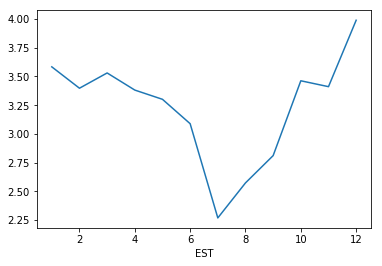

In [240]:
df_nyc.groupby(df_nyc.EST.dt.month).mean()['CloudCover'].plot()

In [245]:
df_nyc.groupby([df_nyc.EST.dt.year.rename('Year'), df_nyc.EST.dt.month.rename('Month')]).mean()['Max_TemperatureF'].head()

Year  Month
2006  1        47.548387
      2        42.321429
      3        50.129032
      4        64.866667
      5        71.387097
Name: Max_TemperatureF, dtype: float64

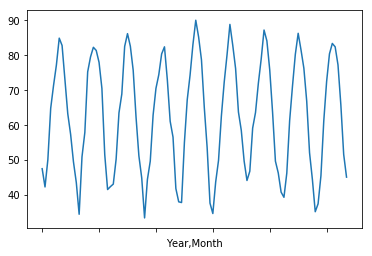

In [246]:
df_nyc.groupby([df_nyc.EST.dt.year.rename('Year'), df_nyc.EST.dt.month.rename('Month')]).mean()['Max_TemperatureF'].plot()